In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from  mpl_toolkits.mplot3d import Axes3D


songs_2010=pd.read_csv('2010.csv')
songs_2000=pd.read_csv('2000.csv')
songs_1990=pd.read_csv('1990.csv')
songs_1980=pd.read_csv('1980.csv')
songs_1970=pd.read_csv('1970.csv')
songs_1960=pd.read_csv('1960.csv')

allsongs=pd.concat([songs_2010,songs_2000,songs_1990,songs_1980,songs_1970,songs_1960],axis=0, ignore_index=True)

features=['bpm','nrgy','dnce']
info=allsongs.dropna(subset=features)

data=info[features].copy()



In [2]:
data = (data - data.min()) / (data.max() - data.min())
data2=data

In [3]:
def optimize(data,maxk):
    means=[]
    initials=[]
    for k in range(1,maxk):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        initials.append(kmeans.inertia_)
        
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,initials,'o-')
    plt.xlabel('clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()
        

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


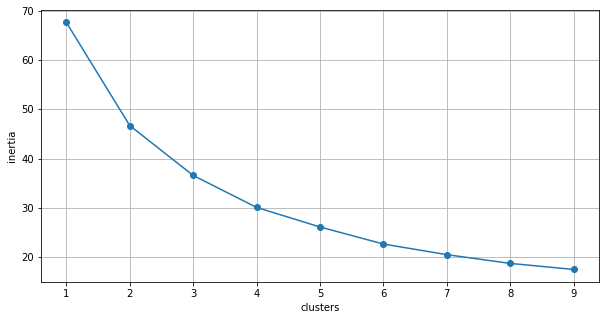

In [4]:
optimize(data,10)

In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data)
data2['kmeanslabels']=kmeans.labels_



In [6]:
data
data2

,bpm,nrgy,dnce,kmeanslabels
0,0.532847,0.393617,0.657895,1
1,0.569343,0.276596,0.763158,1
2,0.540146,0.595745,0.894737,1
3,0.401460,0.521277,0.736842,1
4,0.715328,0.489362,0.513158,0
...,...,...,...,...
589,0.496350,0.638298,0.407895,2
590,0.080292,0.372340,0.250000,0
591,0.379562,0.755319,0.631579,1
592,0.489051,0.659574,0.381579,2


In [7]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [8]:
def plot_clusters(data,data2):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    plt.title(f'kmeans')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=data2['kmeanslabels'])
    plt.show()
    

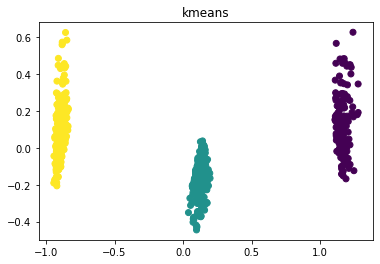

In [9]:
plot_clusters(data,data2)